In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_classification

In [18]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [16]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 불균형 데이터 처리 - 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection

# 불균형 데이터 처리 - 오버 샘플링
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

# 데이터 검증
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

In [3]:
# 깨짐 방지를 위한 Font 지정
import os
if os.name =='nt' : 
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [4]:
# 불균형 데이터에 처리에따른 랜덤포레스트 결과 확인 함수 생성
def Randomforest_Result(x, y, title):
    
    rf = RandomForestClassifier(criterion='entropy')
    cv_rf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    scores = cross_validate(rf, x, y, scoring= 'f1', cv=cv_rf, n_jobs=-1)
    print(title, ':', '3-Fold CV f1 score : %.4f' % np.mean(scores['test_score']))
    
    return

In [ ]:
''' Under Sampling '''

In [7]:
# 데이터셋 준비 및 확인
X_data, y_class = make_classification (n_classes=2, class_sep=1, n_samples=10000,
                                      n_features=20, weights=[0.9, 0.1], flip_y=0,
                                      n_clusters_per_class=1, random_state=10)
print(X_data.shape)
y_class.shape

(10000, 20)


(10000,)

In [12]:
# count_and_plot 그리기 함수
from collections import Counter
from matplotlib import pyplot
def count_and_plot(y):
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)'%(k,v,v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)


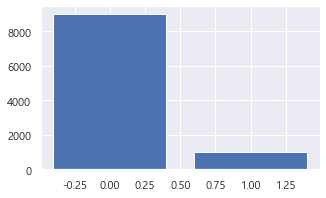

In [13]:
# 데이터셋 가시화
plt.figure(figsize = (5,3))
count_and_plot(y_class)

In [14]:
Randomforest_Result(X_data, y_class, "언더 샘플링_원본 데이터 결과")

언더 샘플링_원본 데이터 결과 : 3-Fold CV f1 score : 0.8225


In [16]:
# sampling_strategy
# - 'majority' (소수 집단과 동일하게 샘플링)
# - 0과 1사이의 숫자를 지정한다. (소수집단 데이터 수 / 다수 집단 데이터 수) 샘플링
under_random = RandomUnderSampler(sampling_strategy='majority')
X_random, y_random = under_random.fit_resample(X_data, y_class)

Class=0, n=1000 (50.000%)
Class=1, n=1000 (50.000%)


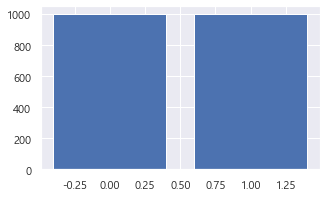

In [17]:
plt.figure(figsize = (5,3))
count_and_plot(y_random)

In [18]:
Randomforest_Result(X_random, y_random, "언더 샘플링_램던언더 샘플링_데이터결과")

언더 샘플링_램던언더 샘플링_데이터결과 : 3-Fold CV f1 score : 0.9174


In [20]:
# sampling_strategy
# 0과 1 사이의 숫자를 지정(소수집단 데이터수 / 다수 집단 데이터수) 하여 샘플링
under_random_05 = RandomUnderSampler(sampling_strategy = 0.5)
X_random_05, y_random_05 = under_random_05.fit_resample(X_data, y_class)

Class=0, n=2000 (66.667%)
Class=1, n=1000 (33.333%)


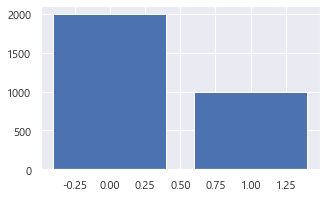

In [21]:
plt.figure(figsize = (5,3))
count_and_plot(y_random_05)

In [26]:
Randomforest_Result(X_random_05, y_random_05, "언더 샘플링_랜덤언더 샘플링_비율 :0.5_데이터결과")

언더 샘플링_랜덤언더 샘플링_비율 :0.5_데이터결과 : 3-Fold CV f1 score : 0.8883


In [27]:
# 토멕링크
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_data, y_class)

Class=0, n=8903 (89.902%)
Class=1, n=1000 (10.098%)


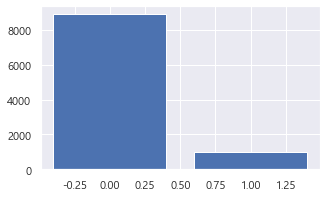

In [28]:
plt.figure(figsize = (5,3))
count_and_plot(y_tl)

In [29]:
Randomforest_Result(X_tl, y_tl, "언더 샘플링_토멕링크_데이터결과")

언더 샘플링_토멕링크_데이터결과 : 3-Fold CV f1 score : 0.8284


In [30]:
#OSS (OneSidedSelection)
oss = OneSidedSelection(random_state=42)
X_oss, y_oss = oss.fit_resample(X_data,y_class)

Class=0, n=8771 (89.766%)
Class=1, n=1000 (10.234%)


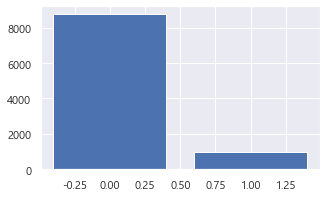

In [31]:
plt.figure(figsize = (5,3))
count_and_plot(y_oss)

In [32]:
Randomforest_Result(X_oss, y_oss, "언더 샘플링_OSS_데이터 결과")

언더 샘플링_OSS_데이터 결과 : 3-Fold CV f1 score : 0.8320


In [33]:
# 데이터셋 준비 및 확인
X_data, y_class = make_classification(n_classes=2, class_sep=2,  n_samples=10000,
                                     n_features=20, weights=[0.9,0.1], flip_y=0,
                                     n_clusters_per_class=1, random_state=10)

(10000, 20)
Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)


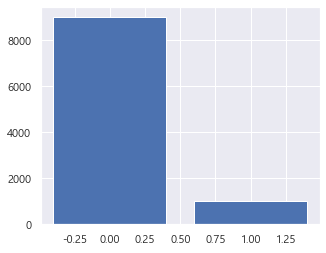

In [34]:
print(X_data.shape)
y_class.shape

plt.figure(figsize= (5,4))
count_and_plot(y_class)

In [36]:
Randomforest_Result(X_data, y_class, "오버 샘플링_원본_데이터 결과")

언더 샘플링_원본_데이터 결과 : 3-Fold CV f1 score : 0.9891


In [37]:
# Randomoversampling
# 랜덤 오버 샘플링
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_data, y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


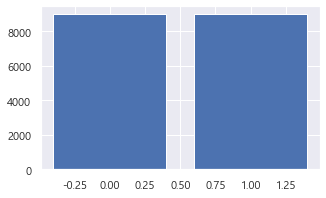

In [38]:
plt.figure(figsize = (5,3))
count_and_plot(y_ros)

In [39]:
Randomforest_Result(X_oss, y_oss, "오버 샘플링_랜덤오버샘플링_데이터 결과")

오버 샘플링_랜덤오버샘플링_데이터 결과 : 3-Fold CV f1 score : 0.8282


In [40]:
# SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_data, y_class)


Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


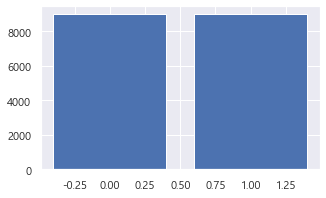

In [41]:
plt.figure(figsize = (5,3))
count_and_plot(y_sm)

In [42]:
Randomforest_Result(X_sm, y_sm, "오버 샘플링_SMOTE_데이터 결과")

오버 샘플링_SMOTE_데이터 결과 : 3-Fold CV f1 score : 0.9988


In [43]:
# ADASYN
ada = ADASYN(random_state = 42)
X_ada, y_ada = ada.fit_resample(X_data, y_class)

Class=0, n=9000 (49.972%)
Class=1, n=9010 (50.028%)


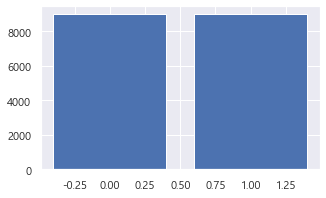

In [44]:
plt.figure(figsize = (5,3))
count_and_plot(y_ada)

In [45]:
Randomforest_Result(X_ada, y_ada, "오버 샘플링_ADASYN_데이터 결과")

오버 샘플링_ADASYN_데이터 결과 : 3-Fold CV f1 score : 0.9988


In [47]:
# Borderline SMOTE
bor_sm = BorderlineSMOTE(random_state=42)
X_bor_sm, y_bor_sm = bor_sm.fit_resample(X_data, y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


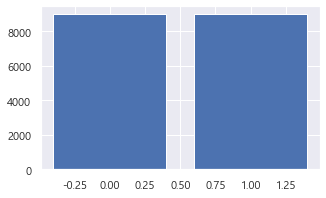

In [48]:
plt.figure(figsize = (5,3))
count_and_plot(y_bor_sm)

In [49]:
Randomforest_Result(X_bor_sm, y_bor_sm, "오버 샘플링_Boderline SMOTE_데이터 결과")

오버 샘플링_Boderline SMOTE_데이터 결과 : 3-Fold CV f1 score : 0.9987
